In [1]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
# file path 
movie_data = "data/movie_dataset.csv"
# reading the data
read_data = pd.read_csv(movie_data)
read_data

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...
4036,220000.0,Action Crime Thriller,9367,es,14.269792,04-09-1992,2.040920e+06,81.0,El Mariachi,6.6,238,Robert Rodriguez
4037,9000.0,Comedy Romance,72766,en,0.642552,26-12-2011,0.000000e+00,85.0,Newlyweds,5.9,5,Edward Burns
4038,0.0,Comedy Drama Romance TV-Movie,231617,en,1.444476,13-10-2013,0.000000e+00,120.0,"Signed, Sealed, Delivered",7.0,6,Scott Smith
4039,0.0,NaN,126186,en,0.857008,03-05-2012,0.000000e+00,98.0,Shanghai Calling,5.7,7,Daniel Hsia


In [2]:
# dropping the data without release date for future use 
read_data_year = read_data.dropna(subset=['release_date'])
# empty list for the list of genres
genres_list = []
seen_genres = set()
num = 0
# accessing the individual genres and updating the dataframe with new column year 
for index, row in read_data.iterrows():
    try:
        read_data_year.loc[index,"Year"]=row['release_date'].split("-")[2]
    except:
        pass
    try:
        splited_word = row["genres"].split()
        for i in splited_word:
            if i not in seen_genres:
                genres_list.append(i)
                seen_genres.add(i)        
    except:
        num = num + 1
# converting the year column into int datatype               
read_data_year["Year"] = read_data_year["Year"].astype(int)

In [3]:
# declaring the dictionary fot the count of movies per genres
count_dict = {}
# function to count the number of movies, calculte the average of votes and the total bugets per genres
def count(gen, cnt):
    sum_vot_avg = 0
    sum_budget = 0
    for index, row in read_data.iterrows():
        try:
            splited_word = row["genres"].split()
            for i in splited_word:
                if gen == i:
                    cnt = cnt + 1 
                    sum_vot_avg = sum_vot_avg + row['vote_average'] 
                    sum_budget = sum_budget + row["budget"]      
        except:
            pass
    return round(cnt,2),round((sum_vot_avg/cnt),2), sum_budget

for genre in genres_list:
    count_dict[genre] =count(genre, 0)
count_dict_df = pd.DataFrame(count_dict).transpose()
count_dict_df.columns = ["number of movies","Ratings","Budget"]
count_dict_df.index.name="Genres"
# saving the data into excel file
count_dict_df.to_excel("analysis/table_with_movies_ratings_budget.xlsx")


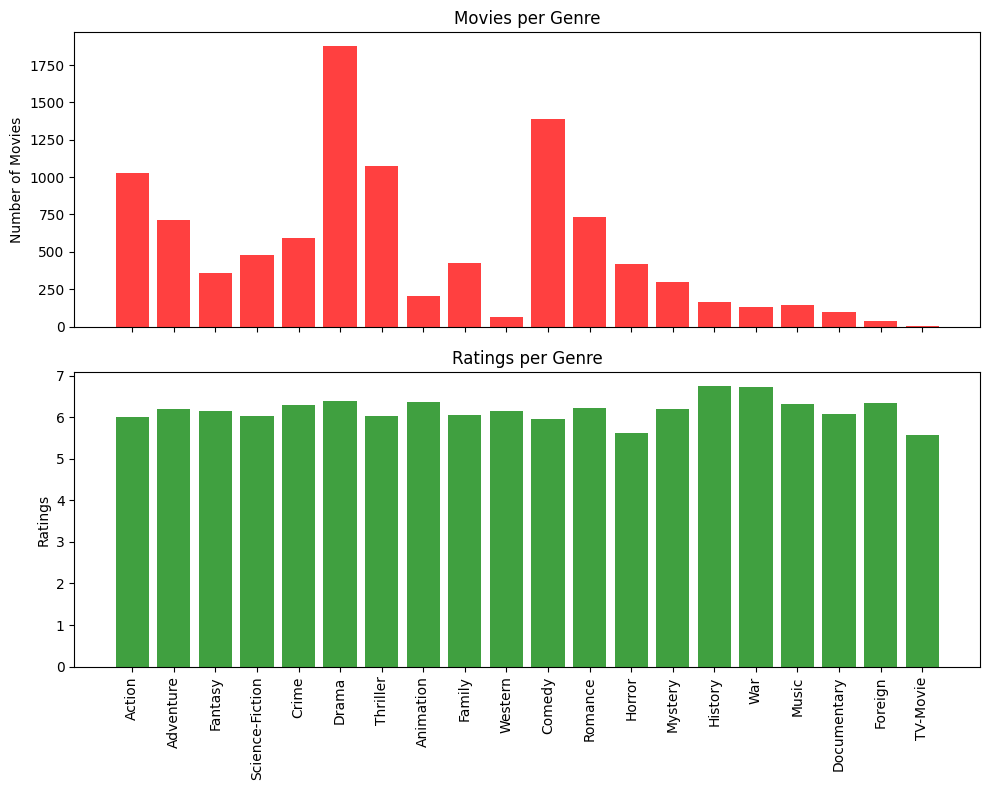

In [4]:
# plotting two bar graph in one frame 
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

ax1[0].bar(count_dict_df.index, count_dict_df['number of movies'], color='red',alpha=0.75)
ax1[0].set_ylabel('Number of Movies')
ax1[0].set_title('Movies per Genre')


ax1[1].bar(count_dict_df.index, count_dict_df['Ratings'], color='green',alpha=0.75)
ax1[1].set_ylabel('Ratings')
ax1[1].set_title('Ratings per Genre')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

In [5]:
# funtion to plot scatter plot and the corealtion value
def lin_reg_plot(x,y,x_lab,y_lab):
    corelation = st.pearsonr(x,y)
    x_values = np.array(x)
    y_values = np.array(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0.05, 0.95), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f"{x_lab} vs {y_lab} and the corelaton value is {round(corelation[0],2)}")
    plt.show()
    

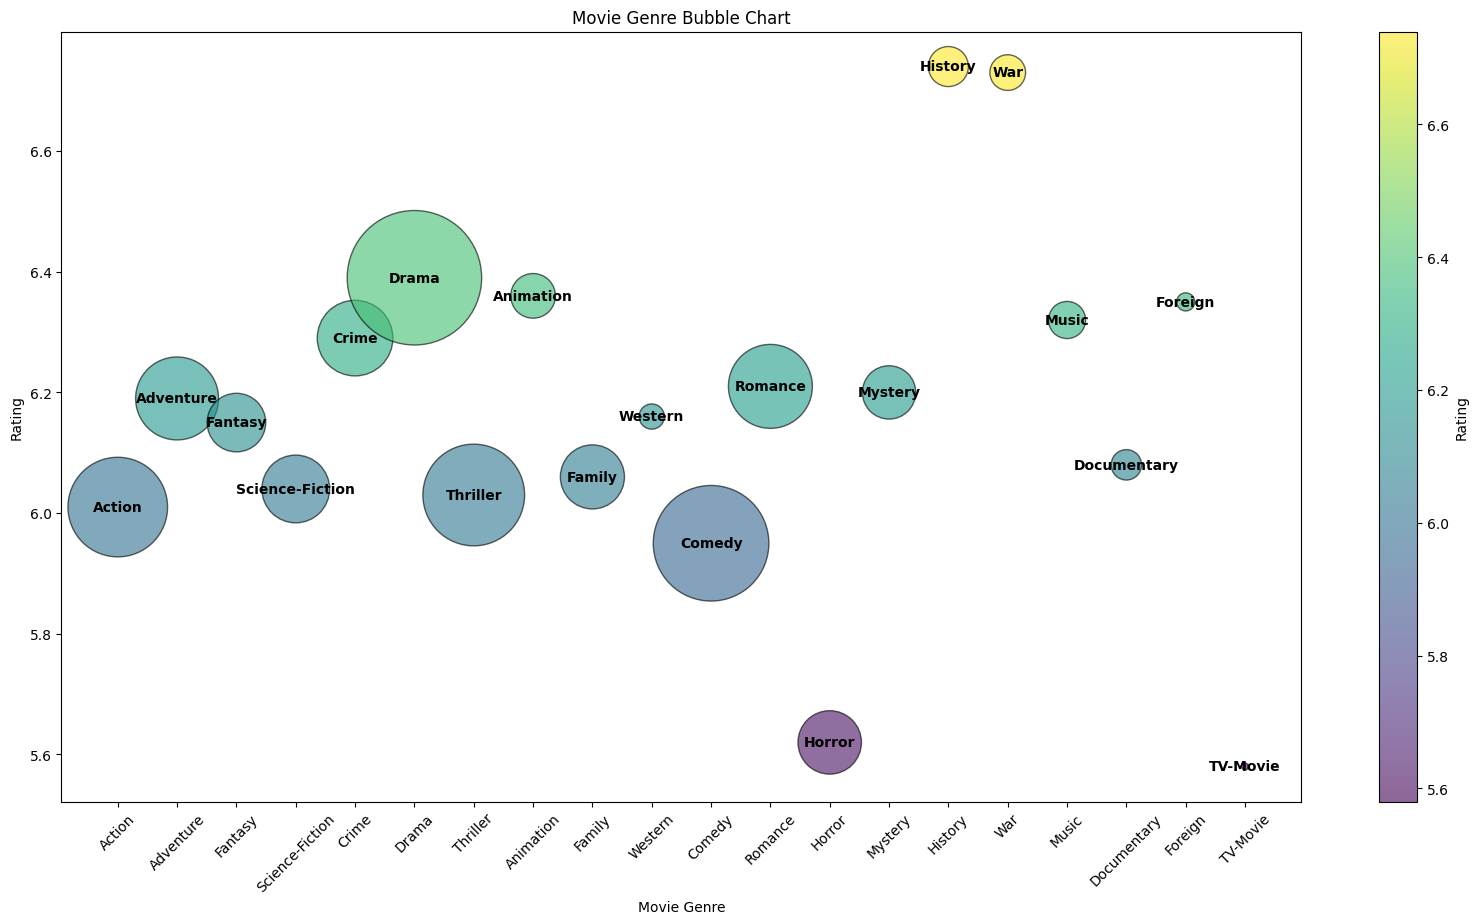

In [6]:
# plotting the bubble plot
x_pos = range(len(count_dict_df))
plt.figure(figsize=(20, 10))
scatter = plt.scatter(x_pos, count_dict_df['Ratings'], s=count_dict_df['number of movies']*5, 
                      alpha=0.6, c=count_dict_df['Ratings'], cmap='viridis',edgecolors="black")

# Adding the genre names in the middle of the bubbles
for i, genre in enumerate(count_dict_df.index):
    plt.text(x_pos[i], count_dict_df['Ratings'][i], genre, ha='center', va='center', color='black', fontweight='bold')

# Adding titles and labels
plt.title('Movie Genre Bubble Chart')
plt.xlabel('Movie Genre')
plt.ylabel('Rating')

# Seting the x-ticks to corresponding to the genre names
plt.xticks(x_pos, count_dict_df.index, rotation=45)

# adding color bar for the ratings
plt.colorbar(label='Rating')

plt.show()



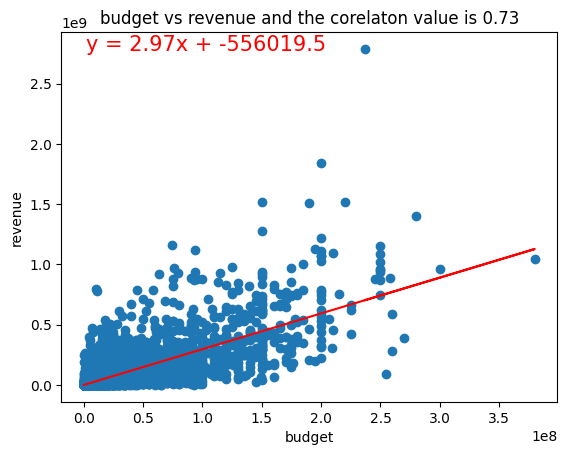

In [7]:
# calling function 
lin_reg_plot(read_data['budget'],read_data['revenue'], 'budget','revenue')

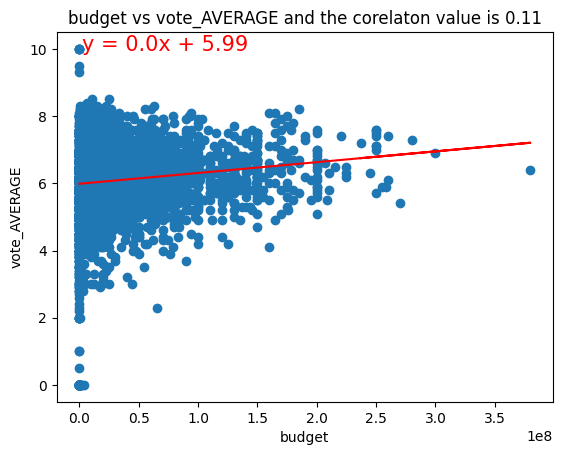

In [8]:
lin_reg_plot(read_data['budget'],read_data['vote_average'], 'budget','vote_AVERAGE')

## Noah


In [9]:
#Find top langauges 
top_languages = read_data['original_language'].value_counts().head(5)

# Display the result
print(top_languages)

original_language
en    3821
fr      45
es      27
zh      20
de      20
Name: count, dtype: int64


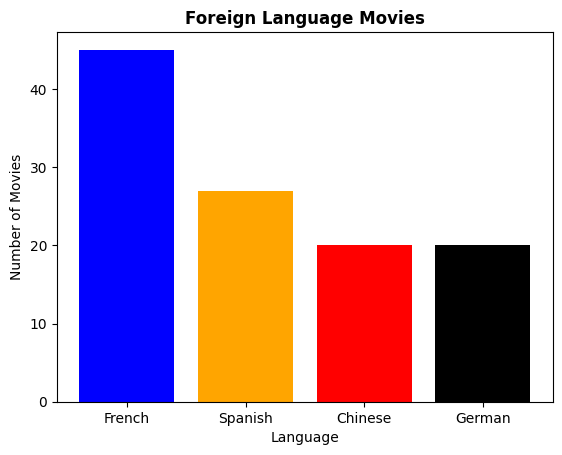

In [10]:
# Top 4 languages
top_languages = read_data['original_language'].value_counts().head(4)

# Labels for the sections of our bar chart
labels = ["French", "Spanish", "Chinese", "German"]

# The values of each section (based on the value_counts)
sizes = [45, 27, 20, 20]

# The colors of each bar
colors = ["blue", "orange", "red", "black"]

# Create the bar chart
plt.bar(labels, sizes, color=colors)


# Add title and labels
plt.title('Foreign Language Movies', fontweight='bold')
plt.ylabel('Number of Movies')
plt.xlabel('Language')
# Display the bar chart
plt.show()

In [11]:
#Find Average rating by language 
average_ratings_by_language = read_data.groupby('original_language')['vote_average'].mean()

# Print the average ratings for the top languages
top_languages_list = ["fr", "es", "zh", "de"]  #French, Spanish, Chinese, German
average_ratings_for_top_languages = average_ratings_by_language[top_languages_list]

print(average_ratings_for_top_languages)

original_language
fr    6.324444
es    6.622222
zh    6.150000
de    6.390000
Name: vote_average, dtype: float64


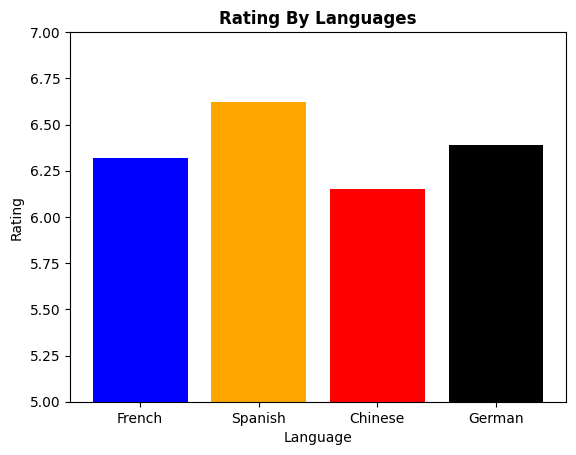

In [12]:
#Find Average rating by language 
average_ratings_by_language = read_data.groupby('original_language')['vote_average'].mean()

# Print the average ratings for the top languages
top_languages_list = ["fr", "es", "zh", "de"]
average_ratings_for_top_languages = average_ratings_by_language[top_languages_list]
#Labels for the sections of our bar chart
labels = ["French", "Spanish", "Chinese", "German"]

# The values of each section (based on the value_counts)
sizes = [6.32,6.62,6.15,6.39]

# Create the pie chart
plt.bar(labels, sizes, color=colors)


# Add title and labels
plt.title('Rating By Languages', fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Rating')
plt.ylim(5,7)
# Display the pie chart
plt.show()


In [13]:
top_languages_list = ["en", "fr", "es", "zh", "de"]

#Find top rated movies (min 1,000 vote count)
filtered_data = read_data[
    (read_data['original_language'].isin(top_languages_list)) & 
    (read_data['vote_count'] >= 1000)]

# Top-rated movie for each language based on vote_average
top_rated_movies = filtered_data.loc[filtered_data.groupby('original_language')['vote_average'].idxmax()]

#Only first genre 
top_rated_movies['genres'] = top_rated_movies['genres'].str.split().str[0]

# Print the title, director, and vote_average columns
print(top_rated_movies[['title', 'director', 'vote_average','genres']])

                         title             director  vote_average   genres
2375                  Downfall  Oliver Hirschbiegel           7.7    Drama
1706  The Shawshank Redemption       Frank Darabont           8.5    Drama
2176           Pan's Labyrinth   Guillermo del Toro           7.6  Fantasy
1178                    Amélie   Jean-Pierre Jeunet           7.8   Comedy


In [14]:
#Full Language Names
language_names = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'zh': 'Chinese',
    'de': 'German'
}

top_rated_movies['original_language'] = top_rated_movies['original_language'].replace(language_names)

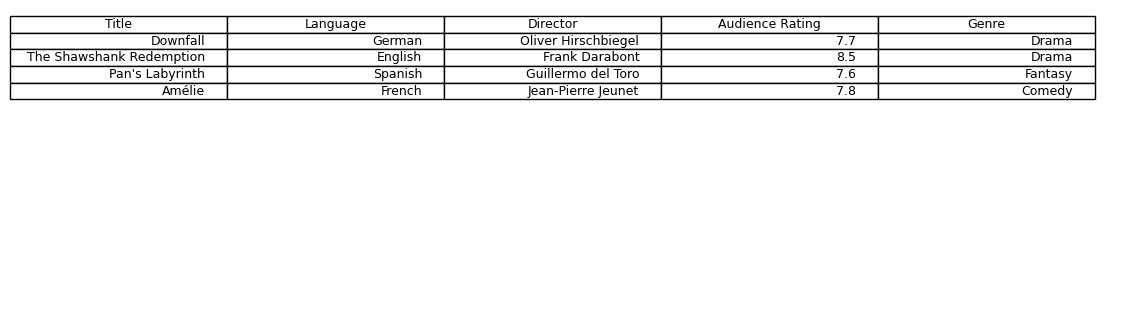

In [15]:
#Data Extraction
data = top_rated_movies[['title','original_language','director', 'vote_average','genres']]

# Create a figure
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')  # Turn off axis
#Table
table = plt.table(cellText=data.values, 
                  colLabels=['Title', 'Language', 'Director', 'Audience Rating','Genre'],
                  loc='best')  
table.set_fontsize(10)
plt.show()
table_df = pd.DataFrame(top_rated_movies)

## Deysi

In [25]:
# Pull month from release_date
read_data["month"] = pd.to_datetime(read_data["release_date"], errors = "coerce").dt.month

# Check for rows with missing month data
read_data = read_data.dropna(subset = ["month"])

# Check months for integer value
read_data["month"] = read_data["month"].astype(int)

# Count # of movies released per month
sorted_month_count = read_data["month"].value_counts().sort_index()

# Convert month # to names
month_by_name = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Create lists for months and movie counts
months = sorted_month_count.index.tolist()
movie_counts = sorted_month_count.values.tolist()

# Set DataFrame
month_df = pd.DataFrame({
    "Month": [month_by_name[m - 1] for m in months],
    "Movies Released": movie_counts})

print("Total Movies Released by Month:")
month_df.to_excel("analysis/movies_by_month.xlsx")
print(month_df)



Total Movies Released by Month:
        Month  Movies Released
0     January              252
1    February              107
2       March              110
3       April              104
4         May              115
5        June              132
6        July              138
7      August              112
8   September              151
9     October              145
10   November              155
11   December              149


In [17]:
# Sort to get top 3 and bottom 3 months
top_3_months = month_df.nlargest(3, "Movies Released")
bottom_3_months = month_df.nsmallest(3, "Movies Released")

# Calculate differences in total # of movies released
month_df["Difference"] = month_df["Movies Released"].diff().abs()
greatest_difference = month_df["Difference"].max()
greatest_difference_months = month_df.iloc[month_df["Difference"].idxmax() - 1: month_df["Difference"].idxmax() + 1]

print("\nTop 3 Months with Most Movies Released:")
print(top_3_months)

print("\nBottom 3 Months with Least Movies Released:")
print(bottom_3_months)

print("\nGreatest Difference in Total Movies Released by month:")
print(greatest_difference_months)


Top 3 Months with Most Movies Released:
        Month  Movies Released
0     January              252
10   November              155
8   September              151

Bottom 3 Months with Least Movies Released:
      Month  Movies Released
3     April              104
1  February              107
2     March              110

Greatest Difference in Total Movies Released by month:
      Month  Movies Released  Difference
0   January              252         NaN
1  February              107       145.0


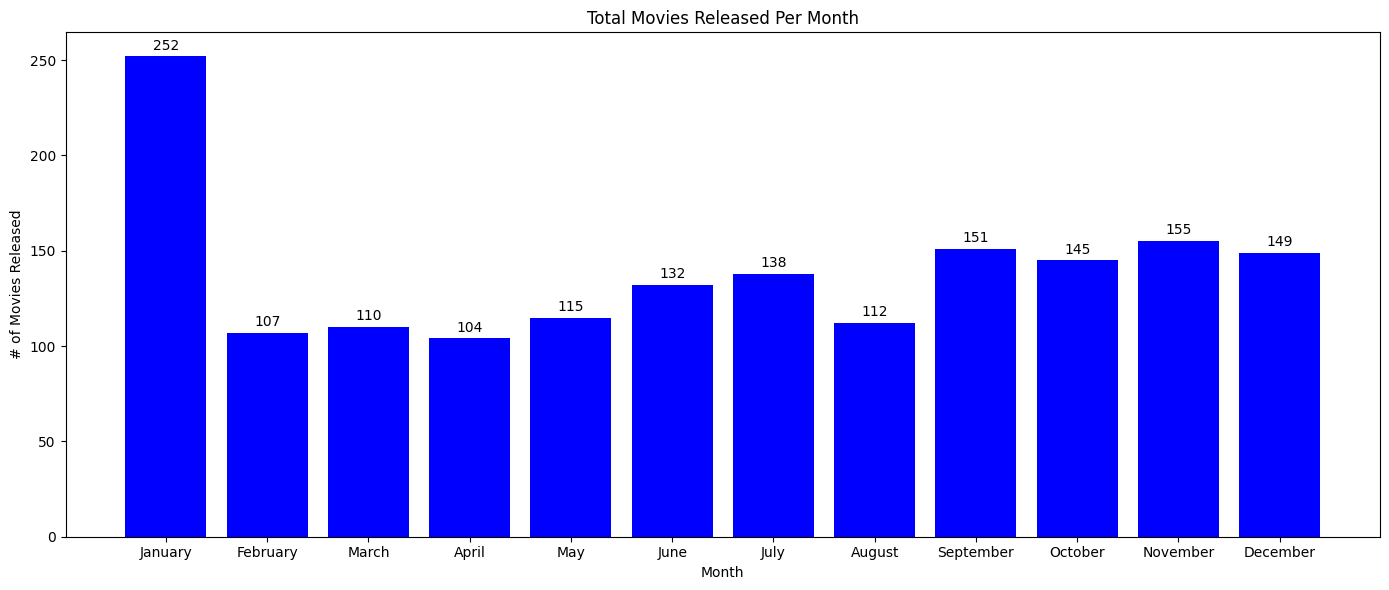

In [18]:
# Create bar chart
x_axis = np.arange(len(month_by_name))

plt.figure(figsize = (14, 6))
bars = plt.bar(x_axis, sorted_month_count, color = "blue", align = "center")

# Annotate movie totals
for bar, count in zip(bars, sorted_month_count): 
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, str(count), ha = "center", va = "bottom", fontsize = 10, color = "black")

# Set title, labels, and ticks
plt.xticks(x_axis, month_by_name)
plt.xlabel("Month")
plt.ylabel("# of Movies Released")
plt.title("Total Movies Released Per Month")

# Display plot
plt.tight_layout()
plt.show()

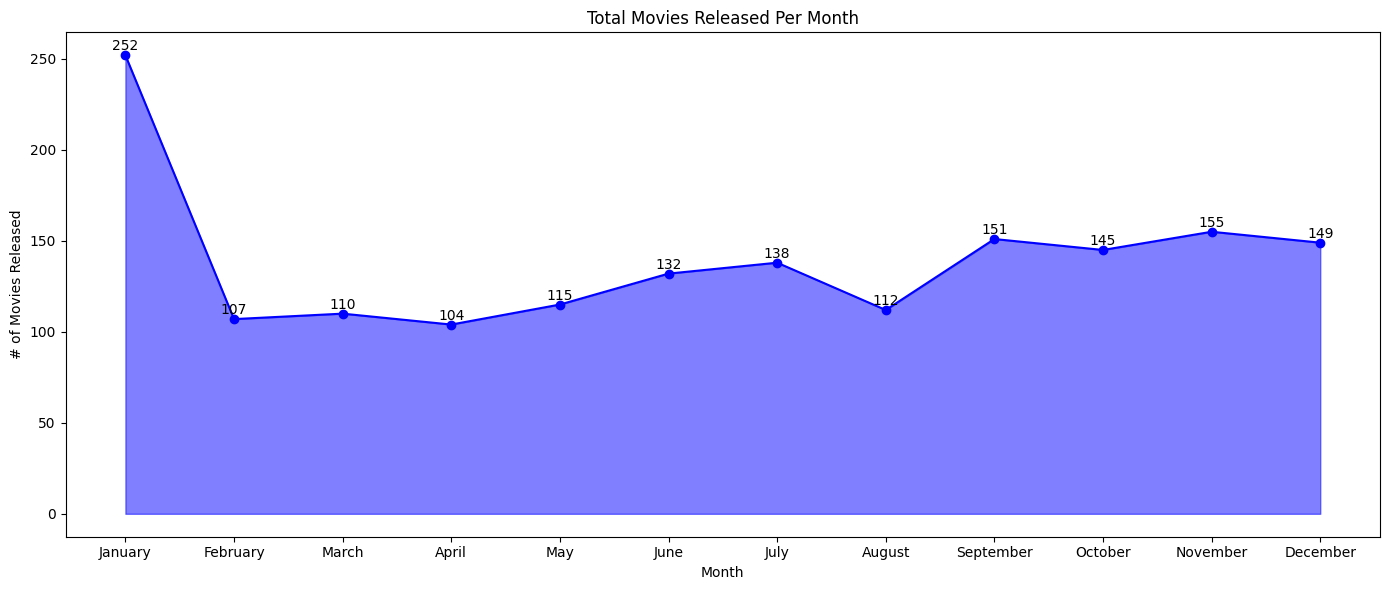

In [19]:
sorted_df = month_df.sort_index()

plt.figure(figsize = (14, 6))

# Plot filled area and line chart
plt.fill_between(sorted_df["Month"], sorted_df["Movies Released"], color = "blue", alpha = 0.5)
plt.plot(sorted_df["Month"], sorted_df["Movies Released"], color = "blue", marker = "o")

# Annotate data points
for x, y in zip(sorted_df["Month"], sorted_df["Movies Released"]): 
    plt.text(x, y + 1, str(y), ha = "center", va = "bottom", fontsize = 10, color = "black")

# Add labels, title
plt.xlabel("Month")
plt.ylabel("# of Movies Released")
plt.title("Total Movies Released Per Month")
plt.tight_layout()

plt.show()

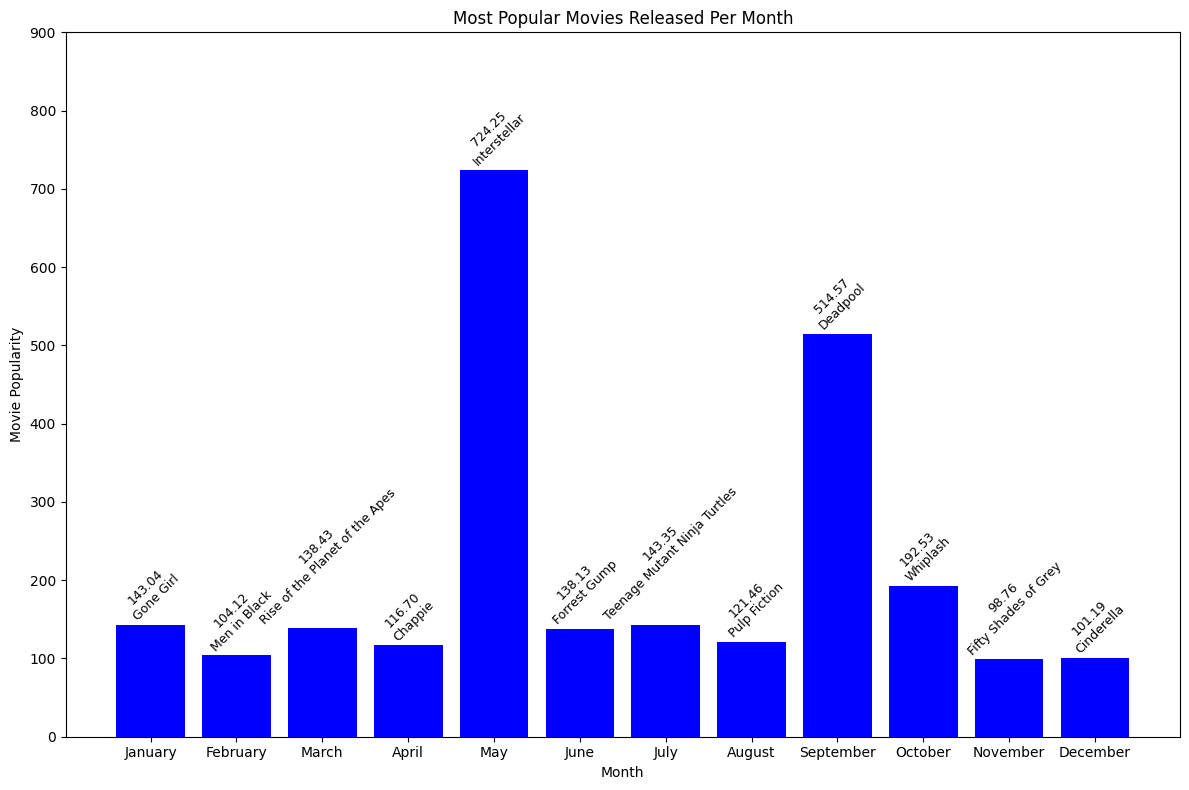

In [20]:
# Check rows for popularity missing values and ensure numeric value
read_data["popularity"] = pd.to_numeric(read_data["popularity"], errors = "coerce")
read_data = read_data.dropna(subset = ["popularity"])

# Group movies by month, get movie with highest popularity
best_movies_by_month = read_data.loc[read_data.groupby("month")["popularity"].idxmax()]

# Pull movie titles and popularity
movie_titles = best_movies_by_month["title"].tolist()
movie_popularity = best_movies_by_month["popularity"].tolist()

# Create bar chart
x_axis = np.arange(len(month_by_name))

plt.figure(figsize=(12, 8))
bars = plt.bar(x_axis, movie_popularity, color="blue", align="center")

# Annotate movie totals and popularity
for bar, count, title in zip(bars, movie_popularity, movie_titles):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"{count:.2f}\n{title}", ha = "center", va = "bottom", fontsize = 9, color = "black", rotation = 45)

# Set title, labels, and ticks
plt.ylim(0,900)
plt.xticks(x_axis, month_by_name)
plt.xlabel("Month")
plt.ylabel("Movie Popularity")
plt.title("Most Popular Movies Released Per Month")

plt.tight_layout()
plt.show()

# Jayla

In [21]:

#Top 5 directors with the highest revenue.
directors_revenue = read_data.groupby("director")["revenue"].sum()
top_5_directors = directors_revenue.sort_values(ascending=False).head(5)


print(top_5_directors.index.tolist())


['James Cameron', 'Peter Jackson', 'Steven Spielberg', 'Sam Raimi', 'Robert Zemeckis']


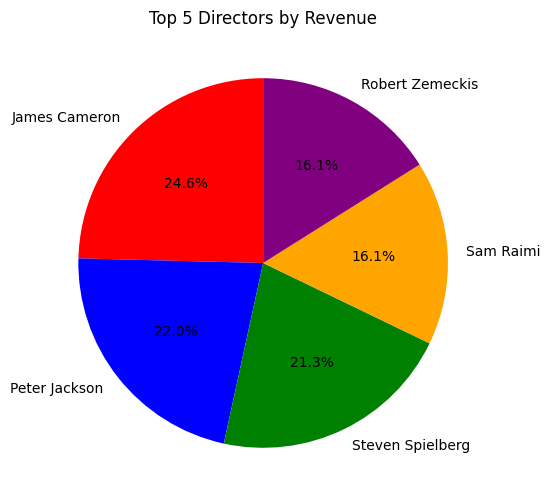

In [22]:
#Create a pie chart the Top 5 directors with the highest revenue
x_axis = np.arange(len(top_5_directors))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(12, 6))  
plt.pie(top_5_directors.values, labels=top_5_directors.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Top 5 Directors by Revenue')
plt.show()


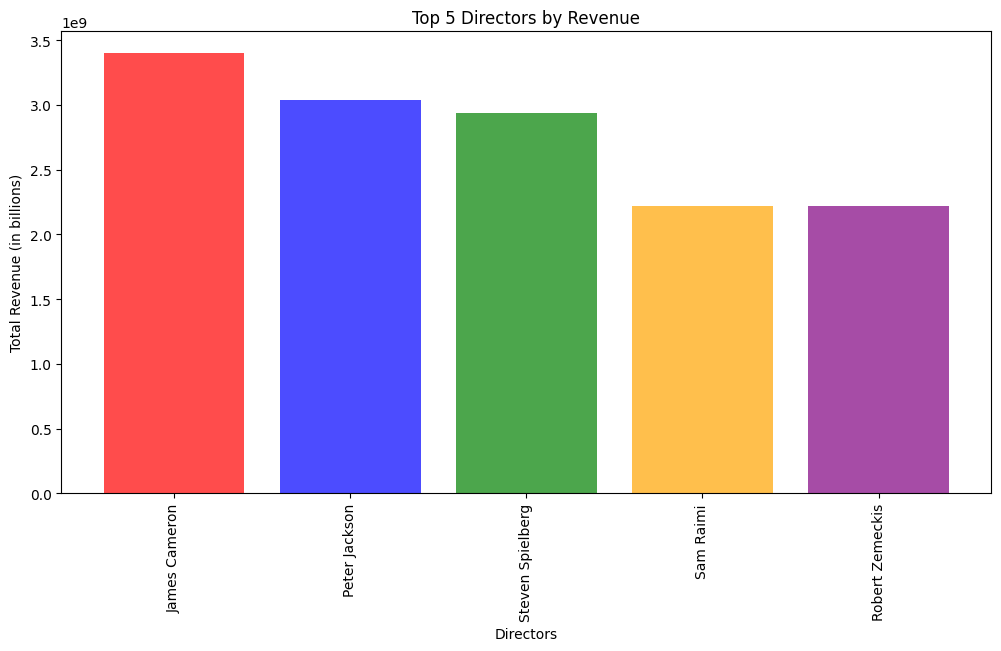

In [23]:
x_axis = np.arange(len(top_5_directors)) 
tick_locations = [value + 0.4 for value in x_axis] 

plt.figure(figsize=(12,6))  
plt.bar(x_axis, top_5_directors.values, color=['red', 'blue', 'green', 'orange', 'purple'], alpha=0.7, align="edge")  
plt.xticks(tick_locations, top_5_directors.index, rotation="vertical") 
plt.title('Top 5 Directors by Revenue')
plt.xlabel('Directors')
plt.ylabel('Total Revenue (in billions)')
plt.show()